<a href="https://colab.research.google.com/github/chang-heekim/Kaggle_Competition/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.3MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Titanic Dataset 
Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 데이터 분석

- 객실 등급별 평균 생존률 

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


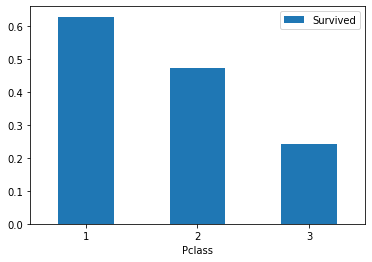

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

# 성별 평균 생존률

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


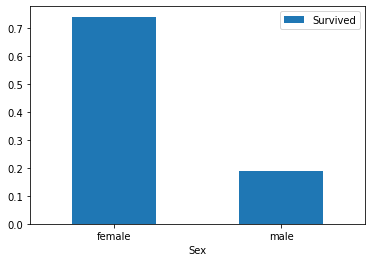

In [ ]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

- 형제자매 / 배우자 수 별 평균 생존률

In [ ]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


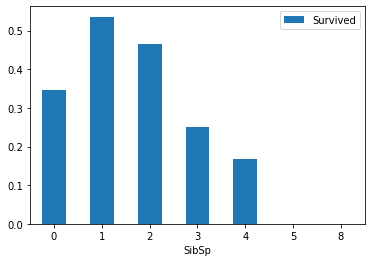

In [ ]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

- 부모 / 자식 수 별 평균 생존률

In [ ]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


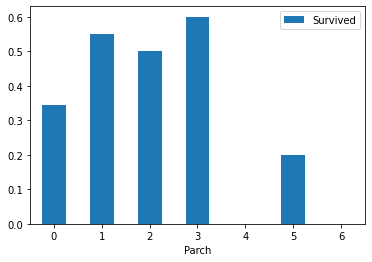

In [ ]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

- 나이별 생존자 수

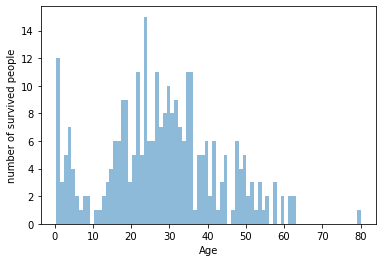

In [ ]:
survived = train_df[train_df.Survived == 1]
survived.Age.plot.hist(alpha=0.5, bins=80)
plt.ylabel('number of survived people')
plt.xlabel('Age')
plt.show()

## 객실 등급과 나이에 따른 생존률 시각화

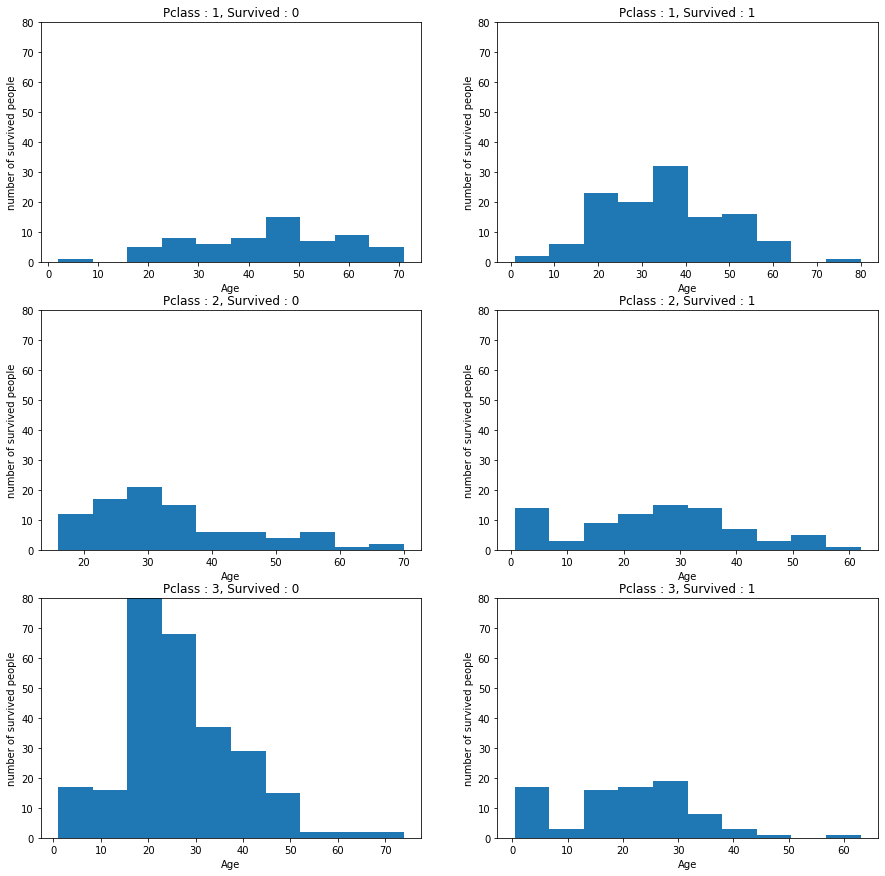

In [ ]:
plt.figure(figsize=(15, 15))
df = train_df[['Age', 'Pclass', 'Survived']]

for i in range(3):
    ax1 = plt.subplot(3, 2, 2 * i + 1)
    df.loc[(df.Pclass == i + 1) & (df.Survived == 0)].Age.plot.hist()
    plt.ylim([0, 80])
    plt.xlabel('Age')
    plt.ylabel('number of survived people')
    plt.title(f'Pclass : {i + 1}, Survived : {0}')

    ax2 = plt.subplot(3, 2, 2 * i + 2)
    df.loc[(df.Pclass == i + 1) & (df.Survived == 1)].Age.plot.hist()
    plt.ylim([0, 80])
    plt.xlabel('Age')
    plt.ylabel('number of survived people')
    plt.title(f'Pclass : {i + 1}, Survived : {1}')

plt.show()
    

## 승선한 항 마다 객실 등급별로 남녀 생존률 시각화

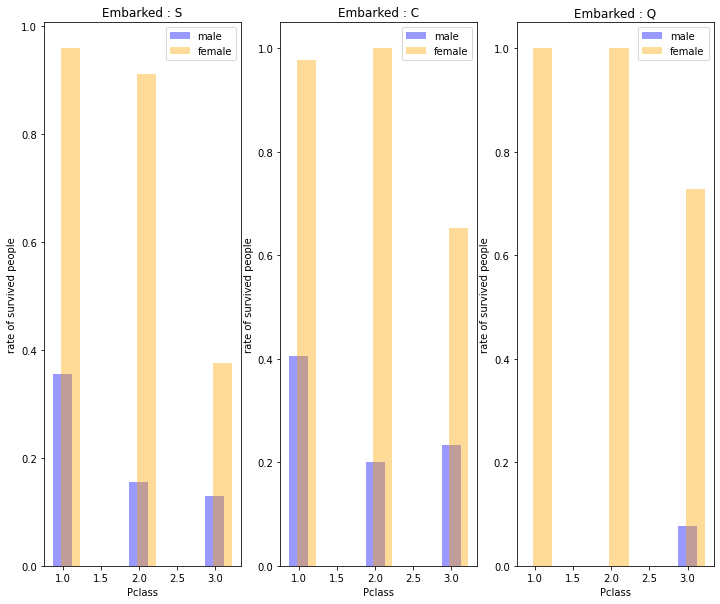

In [ ]:
lst = ['S', 'C', 'Q']
df = train_df[['Embarked', 'Pclass', 'Survived', 'Sex']]
plt.figure(figsize=(12, 10))

for i in range(3):
    df_1 = df.loc[(df.Embarked == lst[i]) & (df.Sex == 'male')]
    df_1 = df_1[['Pclass', 'Survived']].groupby('Pclass').mean()

    df_2 = df.loc[(df.Embarked == lst[i]) & (df.Sex == 'female')]
    df_2 = df_2[['Pclass', 'Survived']].groupby('Pclass').mean()

    plt.subplot(1, 3, i + 1)
    plt.bar(df_1.index, df_1.Survived, 0.25, alpha=0.4, color='blue', label='male')
    plt.bar(df_2.index + 0.1, df_2.Survived, 0.25, alpha=0.4, color='orange', label='female')
    plt.legend()
    plt.xlabel('Pclass')
    plt.ylabel('rate of survived people')
    plt.title(f'Embarked : {lst[i]}')

plt.show()

## 데이터 전처리
- 사용하지 않을 변수 제거(Ticket, Cabin, Fare)

In [ ]:
train_df = train_df.drop(['Ticket', 'Cabin', 'Fare', 'Name', 'PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## str타입의 변수를 정수형으로 변경
- male : 1, female : 2
- S : 1, C : 2, Q : 3

In [ ]:
train_df.Sex = train_df.Sex.map(lambda x: 1 if x == 'male' else 2)
train_df.Sex = train_df.Sex.fillna(0)

mapping = {'S' : 1, 'C' : 2, 'Q' : 3}
train_df.Embarked = train_df.Embarked.map(mapping)
train_df.Embarked = train_df.Embarked.fillna(0)

In [ ]:
train_df.loc[train_df.Age <= 10, 'Age'] = 0
train_df.loc[(train_df.Age > 10) & (train_df.Age <=20), 'Age'] = 1
train_df.loc[(train_df.Age > 20) & (train_df.Age <=23), 'Age'] = 2
train_df.loc[(train_df.Age > 23) & (train_df.Age <=30), 'Age'] = 3
train_df.loc[(train_df.Age > 30) & (train_df.Age <=33), 'Age'] = 4
train_df.loc[(train_df.Age > 33) & (train_df.Age <=40), 'Age'] = 5
train_df.loc[train_df.Age > 40, 'Age'] = 6
train_df.loc[train_df.Age.isnull(), 'Age'] = 7

In [ ]:
train_x = train_df.drop('Survived', axis=1)
train_y = train_df.Survived

## Logistic Regression

In [ ]:
reg = LogisticRegression()
reg.fit(train_x, train_y)
accuracy = reg.score(train_x, train_y)
print(f'acc : {accuracy * 100:.2f}')

acc : 80.58


## SVC

In [ ]:
svc = SVC()
svc.fit(train_x, train_y)
accuracy = svc.score(train_x, train_y)
print(f'acc : {accuracy * 100:.2f}')

acc : 82.49


## K-NN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
accuracy = knn.score(train_x, train_y)
print(f'acc : {accuracy * 100:.2f}')

acc : 84.85


## Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
accuracy = decision_tree.score(train_x, train_y)
print(f'acc : {accuracy * 100:.2f}')

acc : 87.99


## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
accuracy = random_forest.score(train_x, train_y)
print(f'acc : {accuracy * 100:.2f}')

acc : 87.99


## 테스트 데이터 전처리

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df = test_df.drop(['Ticket', 'Cabin', 'Fare', 'Name', 'PassengerId'], axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [ ]:
test_df.Sex = test_df.Sex.map(lambda x: 1 if x == 'male' else 2)
test_df.Sex = test_df.Sex.fillna(0)

mapping = {'S' : 1, 'C' : 2, 'Q' : 3}
test_df.Embarked = test_df.Embarked.map(mapping)
test_df.Embarked = test_df.Embarked.fillna(0)

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,3
1,3,2,47.0,1,0,1
2,2,1,62.0,0,0,3
3,3,1,27.0,0,0,1
4,3,2,22.0,1,1,1


In [ ]:
test_df.loc[test_df.Age <= 10, 'Age'] = 0
test_df.loc[(test_df.Age > 10) & (test_df.Age <=20), 'Age'] = 1
test_df.loc[(test_df.Age > 20) & (test_df.Age <=23), 'Age'] = 2
test_df.loc[(test_df.Age > 23) & (test_df.Age <=30), 'Age'] = 3
test_df.loc[(test_df.Age > 30) & (test_df.Age <=33), 'Age'] = 4
test_df.loc[(test_df.Age > 33) & (test_df.Age <=40), 'Age'] = 5
test_df.loc[test_df.Age > 40, 'Age'] = 6
test_df.loc[test_df.Age.isnull(), 'Age'] = 7

In [ ]:
test_x = test_df

## 정확도가 가장 높은 Decision Tree, Random Forest로 예측

In [ ]:
tree_predict = decision_tree.predict(test_x)

In [ ]:
forest_predict = random_forest.predict(test_x)

In [ ]:
sub = pd.read_csv('/content/gender_submission.csv')
sub = sub.drop(['Survived'], axis=1)
sub.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [ ]:
tree_predictions = pd.Series(tree_predict, name='Survived')
forest_predictions = pd.Series(forest_predict, name='Survived')

In [ ]:
tree_submission = pd.DataFrame({"PassengerId": sub["PassengerId"], "Survived": tree_predictions})
forest_submission = pd.DataFrame({"PassengerId": sub["PassengerId"], "Survived": forest_predictions})

In [ ]:
tree_submission.to_csv('submission_tree.csv', index=False) #  Accuracy : 0.76794
forest_submission.to_csv('submission_forest.csv', index=False)  # Accuracy : 0.75358